In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Question 1
*part A & B*

In [2]:
muA = -1 #kJ/mol
muB = -15 #kJ/mol
dG_st = muB - muA #KJ/mol
dG_st *= 1000 #J / mol
R = 8.3145 #J/ mol K
T = 310 #K
Keq = np.e ** (-dG_st/(R*T))
print('deltaG Standard (Joules/mol): ', dG_st)
print('Keq: ', Keq)

deltaG Standard (Joules/mol):  -14000
Keq:  228.5215058109785


*Part D*

In [3]:
B = 0.01 #mol/1L
A = 1.99 #mol/1L
Q = B/A

dG = dG_st + R*T*np.log(Q)
print('deltaG (Joules/mol): ', dG)

deltaG (Joules/mol):  -27643.466719203258


*Part E*

In [4]:
n_tot = 2 #mol
L = 1 #Liters
nA = 2/(Keq + 1) #mol
nB = n_tot - nA #mol
M_A = nA/L
M_B = nB/L
print(f'[A] = {M_A:.4f} M and [B] = {M_B:.4f} M')

[A] = 0.0087 M and [B] = 1.9913 M


*Part F*

In [5]:
#dG = dG_st + R*T*np.log(M_B/M_A) #Joules
#print(f'deltaG from std. state to Eq: {dG}')
Gt_I = 1*muA*1000 + 1*muB*1000
Gt_F = nA*(muA*1000 + R*T*np.log(nA/1)) + nB*(muB*1000 + R*T*np.log(nB))

DGt = Gt_F - Gt_I
print(Gt_I)
print(Gt_F)
print(DGt)

-16000
-26449.34201097052
-10449.342010970518


### Question 2
*Part A*


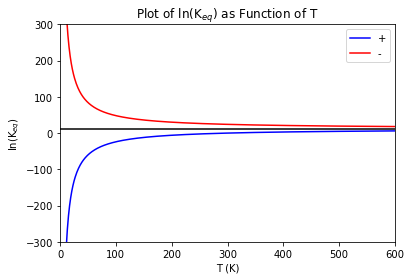

In [6]:
DSst = 100 #J/K mol
def ln(T, DH_st, DS_st):
    R = 8.3145 #J/mol K
    return -DH_st/(R*T) + DS_st/R

X = np.arange(1, 601, 1)
positive = ln(X, 30000, DSst)
negative = ln(X, -30000, DSst)

plt.plot(X, positive, 'b', label="+")
plt.plot(X, negative,'r', label="-")
plt.axis([0, 600, -300, 300])
plt.legend()
plt.xlabel("T (K)")
plt.ylabel("ln(K$_{eq}$)")
plt.title("Plot of ln(K$_{eq}$) as Function of T")
plt.hlines(DSst/R, 0, 1000,'k');

*Part F*
> The slope of the Van't Hoff plot is equal to -${\Delta}$H / R and thus is always linear. It is positive when ${\Delta}$H is negative and negative when ${\Delta}$H is positive.

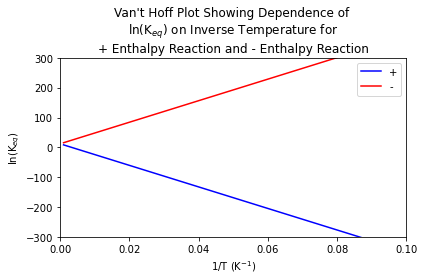

In [7]:
Xs = np.arange(0.001, 0.1001, 0.001)
vh_Xs = np.array([1/x for x in Xs])

pos = ln(vh_Xs, 30000, DSst)
neg = ln(vh_Xs, -30000, DSst)

plt.plot(Xs, pos, "b", label="+")
plt.plot(Xs, neg, "r", label="-")
plt.legend()
plt.axis([0,0.1,-300,300])
plt.xlabel("1/T (K$^{-1}$)")
plt.ylabel("ln(K$_{eq}$)")
plt.title("Van't Hoff Plot Showing Dependence of \nln(K$_{eq}$) on Inverse Temperature for \n+ Enthalpy Reaction and - Enthalpy Reaction")
plt.tight_layout();

### Problem 5.4
*Part A*

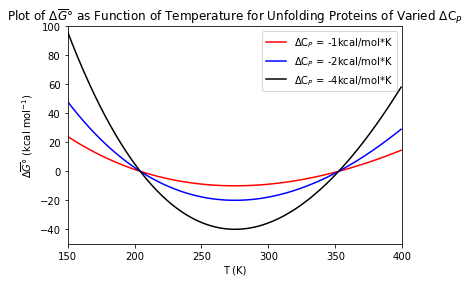

In [8]:
def DGbarstd(T, DCp, Th=265, Ts=275):
    return DCp*(T-Th) - T*DCp*np.log(T/Ts)
    
Ts = np.arange(150, 400, 1)
A = DGbarstd(Ts, -1)
B = DGbarstd(Ts, -2)
C = DGbarstd(Ts, -4)

plt.plot(Ts, A,'r', label="$\Delta$C$_P$ = -1kcal/mol*K")
plt.plot(Ts, B,'b', label="$\Delta$C$_P$ = -2kcal/mol*K")
plt.plot(Ts, C,'k', label="$\Delta$C$_P$ = -4kcal/mol*K")
plt.legend()
plt.axis([150, 400, -50, 100])
plt.xlabel("T (K)")
plt.title("Plot of $\Delta$$\overline{G}$$\degree$ as Function of Temperature for Unfolding Proteins of Varied $\Delta$C$_P$")
plt.ylabel("$\Delta$$\overline{G}$$\degree$ (kcal mol$^{-1}$)");

*Part B*
> Protein F has the steepest transition because the slope of the transition is set by $\Delta$H$_{Tm}$ . According to equation 8.47 in the textbook, the first temperature derivative of the fraction native function is $\frac{K}{(1+K)^2}$ $\frac{\Delta\overline{H}}{ {RT^{2}}}$ and thus as the magnitude of $\Delta$H$_{Tm}$ increases, so does the steepness of the unfolding curve.

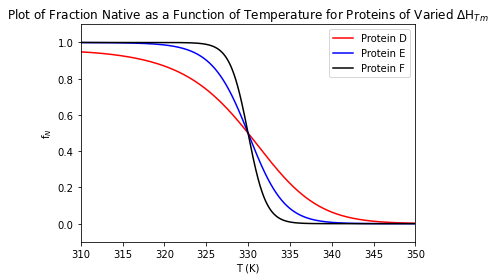

In [50]:
def fraction_native(T, Tm, DHtm, DCp):
    R = 1.987204e-3 #IDG constant in kcal/mol K
    DGb = DHtm + (DCp*(T-Tm)) - ((T*DHtm)/Tm) - (T*DCp*np.log(T/Tm))
    K = np.e ** ((-1*DGb)/(R*T))
    fn = K / (K+1)
    return fn


Ts = np.arange(300,500,0.01)
D = fraction_native(Ts, 330, -50, -2)
E = fraction_native(Ts, 330, -100, -2)
F = fraction_native(Ts, 330, -200, -2)

plt.plot(Ts, D, 'r', label="Protein D")
plt.plot(Ts, E, 'b', label="Protein E")
plt.plot(Ts, F, 'k', label="Protein F")
plt.axis([310,350,-0.1,1.1])
plt.ylabel("f$_{N}$")
plt.xlabel("T (K)")
plt.title("Plot of Fraction Native as a Function of Temperature for Proteins of Varied $\Delta$H$_{Tm}$")
plt.legend();